In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

result_value = pd.DataFrame({
    'x': [100, 200, 400, 800, 1600, 3200, 6400],
    'y': [77696, 32587, 13411, 6440, 3026, 1544, 639],
})

data_one_process = pd.DataFrame({
    'n_agents': ['100', '200', '400', '800', '1600', '3200', '6400'],
    'n_cores': [1, 1, 1, 1, 1, 1, 1],
    'speedup': [1, 1, 1, 1, 1, 1, 1],
    'time': [
        2.87,
        10.27,
        38.27,
        146.94,
        574.33,
        2270.54,
        9014.81
    ]
})

data_two_processes = pd.DataFrame({
    'n_agents': ['100', '200', '400', '800', '1600', '3200', '6400'],
    'n_cores': [2,2,2,2,2,2,2],
    'time': [
        1.34,
        4.87,
        18.56,
        72.28,
        284.47,
        1129.83,
        4526.27
    ]
})
data_two_processes["speedup"] = data_one_process["time"] / data_two_processes["time"]

data_four_processes = pd.DataFrame({
    'n_agents': ['100', '200', '400', '800', '1600', '3200', '6400'],
    'n_cores': [4, 4, 4, 4, 4, 4, 4],
    'time': [
        0.72,
        2.58,
        9.8,
        38.12,
        150.12,
        600.53,
        2365.88
    ]
})
data_four_processes["speedup"] = data_one_process["time"] / data_four_processes["time"]

data_eight_processes = pd.DataFrame({
    'n_agents': ['100', '200', '400', '800', '1600', '3200', '6400'],
    'n_cores': [8, 8, 8, 8, 8, 8, 8],
    'time': [
        0.4,
        1.33,
        4.95,
        18.99,
        74.57,
        296.02,
        1178.49
    ]
})
data_eight_processes["speedup"] = data_one_process["time"] / data_eight_processes["time"]

data_sixteen_processes = pd.DataFrame({
    'n_agents': ['100', '200', '400', '800', '1600', '3200', '6400'],
    'n_cores': [16, 16, 16, 16, 16, 16, 16],
    'time': [
        0.27,
        0.8,
        2.83,
        10.75,
        41.56,
        163.26,
        649.66
    ]
})
data_sixteen_processes["speedup"] = data_one_process["time"] / data_sixteen_processes["time"]
data_thirtytwo_processes = pd.DataFrame({
    'n_agents': ['100', '200', '400', '800', '1600', '3200', '6400'],
    'n_cores': [32, 32, 32, 32, 32, 32, 32],
    'time': [
        0.2,
        0.52,
        1.66,
        5.7,
        21.35,
        81.7,
        337.46
    ]
})
data_thirtytwo_processes["speedup"] = data_one_process["time"] / data_thirtytwo_processes["time"]
data_sixtyfour_processes = pd.DataFrame({
    'n_agents': ['100', '200', '400', '800', '1600', '3200', '6400'],
    'n_cores': [64, 64, 64, 64, 64, 64, 64],
    'time': [
        0.192,
        0.432,
        1.054,
        3.53,
        12.65,
        45.594,
        189.932
    ]
})
data_sixtyfour_processes["speedup"] = data_one_process["time"] / data_sixtyfour_processes["time"]

result_times = pd.concat([data_one_process, data_two_processes, data_four_processes,
                  data_eight_processes, data_sixteen_processes,
                  data_thirtytwo_processes, data_sixtyfour_processes], axis=0)
result_times["efficiency"] = result_times["speedup"] / result_times["n_cores"]

"""
2.87	10.27	38.27	146.94	574.33	2270.54	9014.81
1.34	4.87	18.56	72.28	284.47	1129.83	4526.27
0.72	2.58	9.8	38.12	150.12	600.53	2365.88
0.4	1.33	4.95	18.99	74.57	296.02	1178.49
0.27	0.8	2.83	10.75	41.56	163.26	649.66
0.2	0.52	1.66	5.7	21.35	81.7	337.46
0.192	0.432	1.054	3.53	12.65	45.594	189.932"""

print(data_one_process)
print(result_times)

  n_agents  n_cores  speedup     time
0      100        1        1     2.87
1      200        1        1    10.27
2      400        1        1    38.27
3      800        1        1   146.94
4     1600        1        1   574.33
5     3200        1        1  2270.54
6     6400        1        1  9014.81
  n_agents  n_cores    speedup      time  efficiency
0      100        1   1.000000     2.870    1.000000
1      200        1   1.000000    10.270    1.000000
2      400        1   1.000000    38.270    1.000000
3      800        1   1.000000   146.940    1.000000
4     1600        1   1.000000   574.330    1.000000
5     3200        1   1.000000  2270.540    1.000000
6     6400        1   1.000000  9014.810    1.000000
0      100        2   2.141791     1.340    1.070896
1      200        2   2.108830     4.870    1.054415
2      400        2   2.061961    18.560    1.030981
3      800        2   2.032928    72.280    1.016464
4     1600        2   2.018948   284.470    1.009474
5     3

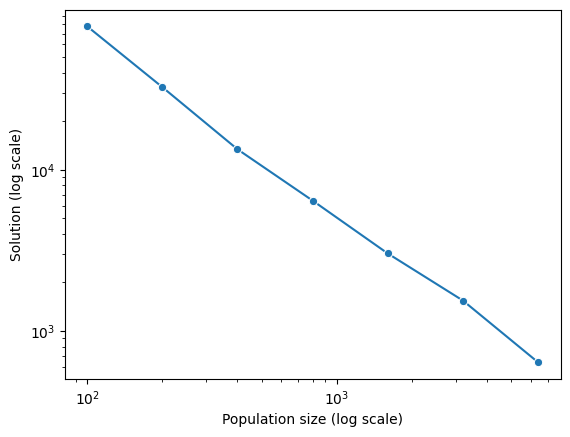

In [2]:
figure_1 = plt.figure()
ax = plt.gca()

sns.lineplot(x='x', y='y', data=result_value, marker="o", ax=ax, dashes=False)
ax.set_ylabel('Solution (log scale)')
ax.set_xlabel('Population size (log scale)')
ax.set_xscale('log')
ax.set_yscale('log')
#sns.regplot(x="x", y="y", data=data, ax=ax, ci=None, scatter=False, color='red');


plt.show()
figure_1.savefig('evaluation_solution.png')

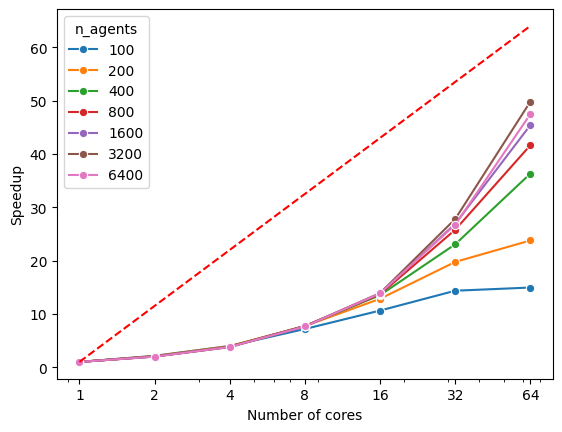

In [ ]:
figure_1 = plt.figure()
ax = plt.gca()

#result_times["speedup"] = result_times['time'].max() / result_times['time']

sns.lineplot(x='n_cores', y='speedup', data=result_times, marker="o", ax=ax, dashes=False, hue='n_agents')
ax.set_xscale('log')
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64])
#add a linear line as y= x
ax.plot([1, 64], [1, 64], color='red', linestyle='--')

ax.set_xlabel('Number of cores (log scale)')
ax.set_ylabel('Speedup')

plt.show()
figure_1.savefig('speedup.png')

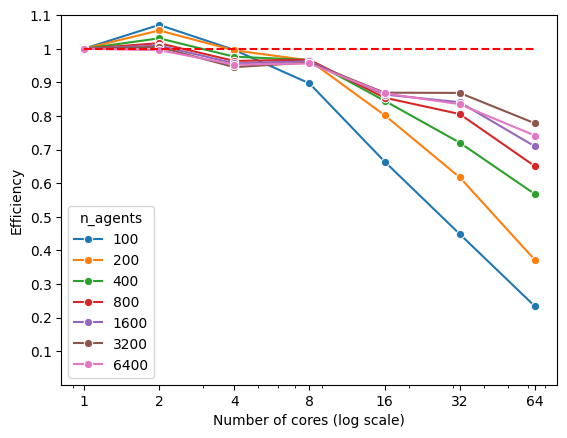

In [23]:
figure_1 = plt.figure()
ax = plt.gca()

#result_times["speedup"] = result_times['time'].max() / result_times['time']

sns.lineplot(x='n_cores', y='efficiency', data=result_times, marker="o", ax=ax, dashes=False, hue='n_agents')
ax.set_xscale('log')
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64])

ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
ax.set_yticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
#add a linear line as y= 1
ax.plot([1, 64], [1, 1], color='red', linestyle='--')
ax.set_ylim(0, 1.1)

ax.set_xlabel('Number of cores (log scale)')
ax.set_ylabel('Efficiency')

plt.show()
figure_1.savefig('efficiency.png')

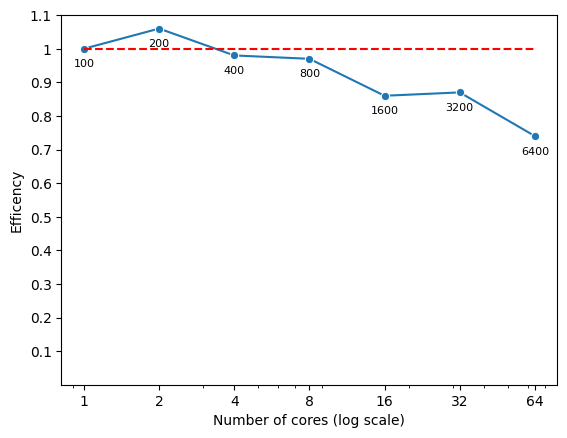

In [43]:
figure_1 = plt.figure()
ax = plt.gca()

scalability_data = pd.DataFrame({
    'n_agents': ['100', '200', '400', '800', '1600', '3200', '6400'],
    'n_cores': [1, 2, 4, 8, 16, 32, 64],
    'efficiency': [
        1,
        1.06,
        0.98,
        0.97,
        0.86,
        0.87,
        0.74
    ]
})

#result_times["speedup"] = result_times['time'].max() / result_times['time']

sns.lineplot(x='n_cores', y='efficiency', data=scalability_data, marker="o", ax=ax, dashes=False)
ax.set_xscale('log')
ax.set_xticks([1, 2, 4, 8, 16, 32, 64])
ax.set_xticklabels([1, 2, 4, 8, 16, 32, 64])

#Add lable to each point
for i, txt in enumerate(scalability_data['n_agents']):
    ax.annotate(txt, (scalability_data['n_cores'][i], scalability_data['efficiency'][i]-0.06), fontsize=8, ha='center', va='bottom')

ax.set_yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
ax.set_yticklabels([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
#add a linear line as y= 1
ax.plot([1, 64], [1, 1], color='red', linestyle='--')
ax.set_ylim(0, 1.1)

ax.set_xlabel('Number of cores (log scale)')
ax.set_ylabel('Efficency')

plt.show()
figure_1.savefig('scalability.png')